In [1]:
import numpy as np
import healpy as hp
import os
import astropy.table as atpy
import matplotlib.pyplot as plt
from pixell import enmap, utils, enplot, reproject
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.newvisufunc import projview, newprojplot

In [2]:
save_plots = False

In [ ]:
f = '100'
path_planck_map_init = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/planck/maps/npipe6v20AB/planck_hp_{f}_bundle0_nside512_coords_c.fits'
# path_planck_map_init = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/planck/maps/npipe6v20AB/planck_car_{f}_bundle0_res1.0amin_coords_c.fits'
path_planck_map_filtered = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/filtered_data/planck/npipe6v20_A_B/satp3/f{f}/coadded_maps/planck_car_{f}_bundle0_res1.0amin_coords_c_f090_science_filtered.fits'

suffixes = ['01', '04']

for suffix in suffixes:
    path_catalog = f'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/planck/point_sources/COM_PCCS_{f}_R2.{suffix}.fits'  # 04  #01
    if os.path.exists(path_catalog):
        print(f"Catalog found: {path_catalog}")
        break
else:
    print("No catalog found.")

Catalog found: /scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data/planck/point_sources/COM_PCCS_030_R2.04.fits


#### Ps catalog

In [4]:
tab = atpy.Table().read(path_catalog)
tab[:10]

NAME,GLON,GLAT,RA,DEC,DETFLUX,DETFLUX_ERR,APERFLUX,APERFLUX_ERR,PSFFLUX,PSFFLUX_ERR,GAUFLUX,GAUFLUX_ERR,GAU_SEMI1,GAU_SEMI1_ERR,GAU_SEMI2,GAU_SEMI2_ERR,GAU_THETA,GAU_THETA_ERR,GAU_FWHM_EFF,P,P_ERR,ANGLE_P,ANGLE_P_ERR,APER_P,APER_P_ERR,APER_ANGLE_P,APER_ANGLE_P_ERR,P_UPPER_LIMIT,APER_P_UPPER_LIMIT,EXTENDED,EXT_VAL,ERCSC,PCCS,HIGHEST_RELIABILITY_CAT
None,degrees,degrees,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,arcmin,arcmin,arcmin,arcmin,degrees,degrees,arcmin,mJy,mJy,degrees,degrees,mJy,mJy,degrees,degrees,mJy,mJy,0/1,0/1/2/3,None,None,
bytes23,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,bytes24,bytes23,int16
PCCS2 030 G000.07-00.06,0.06700000166893005,-0.05899810791015625,266.5023992209285,-28.909691592085693,222657.61,3119.2317,478023.16,41337.125,478607.62,24378.977,952882.75,4495.7275,77.9091,0.0081,40.299,0.0042,177.8,0.0,59.1041,6198.5776,522.74493,67.56155,2.353689,21452.33,601.1498,-82.84823,0.40687564,0.0,0.0,1,3,PLCKERC030 G000.03-00.03,PCCS1 030 G000.07-00.06,95
PCCS2 030 G000.07+81.65,0.06800000369548798,81.6510009765625,200.4397810896951,22.397251620942168,408.83566,94.44683,234.70445,293.78568,230.68063,142.61537,388.64175,62.97228,32.2402,4.7379,32.0685,4.7127,12.2,54.1,32.1544,--,--,--,--,--,--,--,--,102.01217,140.32935,0,3, ,PCCS1 030 G359.46+81.68,95
PCCS2 030 G000.16-12.70,0.16300000250339508,-12.700996398925781,279.713343965615,-34.76242795690534,430.3813,85.01128,196.11174,261.17334,385.57483,162.94586,352.52118,25.534954,32.8106,5.3048,31.3812,5.0737,145.8,33.3,32.0959,--,--,--,--,--,--,--,--,142.86122,206.5296,0,3, , ,95
PCCS2 030 G000.52-58.35,0.5180000066757202,-58.345001220703125,337.713528560979,-39.68064170700543,579.7142,86.02575,781.7406,233.33667,820.2649,129.43076,757.9549,68.81543,33.6804,2.636,33.1157,2.5918,168.7,23.0,33.398,--,--,--,--,--,--,--,--,93.253555,132.52216,0,3,PLCKERC030 G000.52-58.38,PCCS1 030 G000.54-58.34,95
PCCS2 030 G000.67-42.84,0.6740000247955322,-42.84199523925781,317.3951608558469,-41.174543763965055,715.9696,89.27275,697.39526,273.8648,753.6372,130.33656,726.667,61.46949,32.9952,2.6412,32.5029,2.6018,171.1,29.5,32.749,--,--,--,--,--,--,--,--,100.09852,138.34604,0,3,PLCKERC030 G000.70-42.83,PCCS1 030 G000.66-42.85,95
PCCS2 030 G001.40+45.99,1.399999976158142,45.986000061035156,229.17611842257742,0.2593303671630377,1575.1731,94.050735,1871.8344,234.14584,1797.6382,156.80646,1864.522,57.920265,34.9529,1.1342,33.1952,1.0772,153.9,22.7,34.074,--,--,--,--,--,--,--,--,124.16635,156.6861,0,3,PLCKERC030 G001.39+45.98,PCCS1 030 G001.40+45.97,95
PCCS2 030 G001.58-28.96,1.5759999752044678,-28.962997436523438,299.5045096370939,-38.75531660958244,1854.1306,88.920715,1949.06,227.30495,1877.1486,125.807495,1959.5645,38.98725,34.871,1.0332,30.6383,0.9078,158.4,8.0,32.7546,--,--,--,--,--,--,--,--,106.7963,141.62955,0,3,PLCKERC030 G001.55-28.97,PCCS1 030 G001.58-28.96,95
PCCS2 030 G002.28+65.92,2.2769999504089355,65.91999816894531,214.00663163578903,13.365200054677864,645.88214,86.33332,694.75726,355.42126,745.9881,157.1084,708.60175,46.19206,33.2209,2.7346,32.4614,2.6721,149.7,59.9,32.8411,--,--,--,--,--,--,--,--,108.857155,131.5419,0,3,PLCKERC030 G002.17+65.96,PCCS1 030 G002.22+65.93,95


In [5]:
# Select a point source
i_ps = 0
radius = 2. * utils.degree

RA = tab['RA'][i_ps] * utils.degree
DEC = tab['DEC'][i_ps] * utils.degree
print('RA, DEC', (RA, DEC))

LAT = tab['GLAT'][i_ps] * utils.degree
LON = tab['GLON'][i_ps] * utils.degree

print('(LAT, LON)', (LAT, LON))

RA, DEC (4.651344330869573, -0.5045693040180168)
(LAT, LON) (-0.0010297112354791375, 0.0011693706279645253)


In [6]:
# ### Initial map healpy
# projview(
#     hp.read_map(path_planck_map_init, field=(0,1,2))[0],
#     coord=["G"],
#     graticule=True,
#     graticule_labels=True,
#     unit="cbar label",
#     xlabel="longitude",
#     ylabel="latitude",
#     cb_orientation="vertical",
#     latitude_grid_spacing=45,
#     projection_type="mollweide",
#     norm='hist'
# )
# newprojplot(theta=np.radians(LAT), phi=np.radians(LON), marker="o", color="r", markersize=10)   # colatitude theta, longitude phi

#### Initial map : look around a point source
Read the healpy map and move it to car in the same geometry as the filtered maps (iso geometry)

In [7]:
# imap_init = enmap.read_map(path_planck_map_init)
path_iso_geometry_template = '/home/ar3186/pwg-scripts/iso-sat-review/mapmaking/band_car_fejer1_5arcmin.fits'
shape, wcs = enmap.read_map_geometry(path_iso_geometry_template)
maps_initial_data = hp.read_map(path_planck_map_init, field=(0,1,2))
imap_init = reproject.healpix2map(maps_initial_data, shape=shape, wcs=wcs)

In [8]:
# coord = SkyCoord(ra=RA*u.degree, dec=DEC*u.degree, frame='icrs')
# lat = coord.galactic.l.degree
# lon = coord.galactic.b.degree
# print("Galactic Longitude:", lon)
# print("Galactic Latitude:", lat)

In [9]:
# plotI = enplot.plot(imap_init[0], downgrade=5, colorbar=True, grid=False, annotate=[['circle', LAT, LON, 0,0,10,5,'black']])
# plotQ = enplot.plot(imap_init[1], downgrade=5, colorbar=True, grid=False)
# plotU = enplot.plot(imap_init[2], downgrade=5, colorbar=True, grid=False)
# enplot.show([plotI, plotQ, plotU])

In [10]:
imap_init_sub = imap_init.submap([[DEC - radius, RA - radius], [DEC + radius, RA + radius]])

In [11]:
# plotI = enplot.plot(imap_init_sub[0], upgrade=2, colorbar=True, grid=False)
# plotQ = enplot.plot(imap_init_sub[1], upgrade=2, colorbar=True, grid=False)
# plotU = enplot.plot(imap_init_sub[2], upgrade=2, colorbar=True, grid=False)
# enplot.show([plotI, plotQ, plotU])
# if save_plots:
#     enplot.write(fname=f'figures/planck_map_{f}_initial_1.0amin_ps{i_ps}_I', plot=plotI)
#     enplot.write(fname=f'figures/planck_map_{f}_initial_1.0amin_ps{i_ps}_Q', plot=plotQ)
#     enplot.write(fname=f'figures/planck_map_{f}_initial_1.0amin_ps{i_ps}_U', plot=plotU)

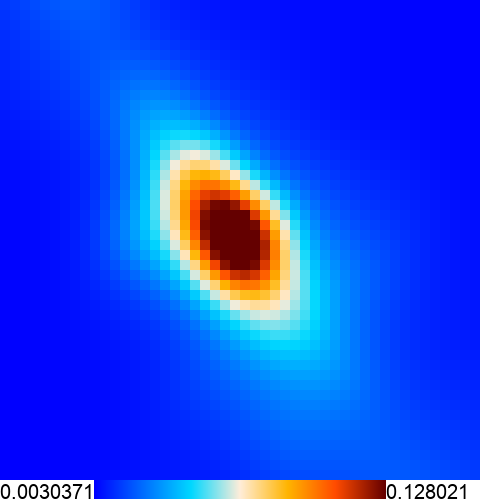

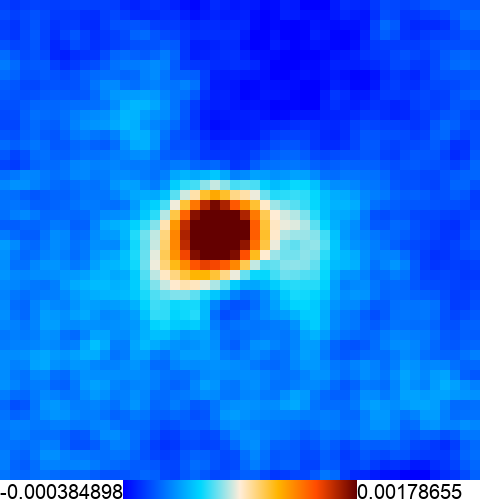

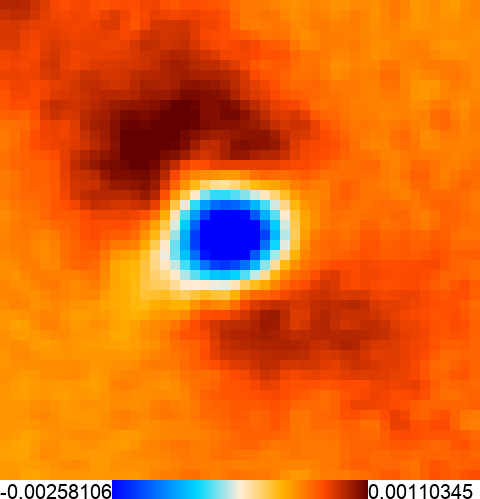

In [12]:
plotI = enplot.plot(imap_init_sub[0], upgrade=10, colorbar=True, grid=False)
plotQ = enplot.plot(imap_init_sub[1], upgrade=10, colorbar=True, grid=False)
plotU = enplot.plot(imap_init_sub[2], upgrade=10, colorbar=True, grid=False)
enplot.show([plotI, plotQ, plotU])
if save_plots:
    enplot.write(fname=f'figures/planck_map_{f}_initial_ps{i_ps}_I', plot=plotI)
    enplot.write(fname=f'figures/planck_map_{f}_initial_ps{i_ps}_Q', plot=plotQ)
    enplot.write(fname=f'figures/planck_map_{f}_initial_ps{i_ps}_U', plot=plotU)

#### Filtered coadded map : look around a point source

In [13]:
imap_filtered = enmap.read_map(path_planck_map_filtered)

In [14]:
# enplot.pshow(imap_filtered[0], downgrade=5, colorbar=True)
# enplot.pshow(imap_filtered[1], downgrade=5, colorbar=True)
# enplot.pshow(imap_filtered[2], downgrade=5, colorbar=True)

In [15]:
imap_filtered_sub = imap_filtered.submap([[DEC - radius, RA - radius], [DEC + radius, RA + radius]])

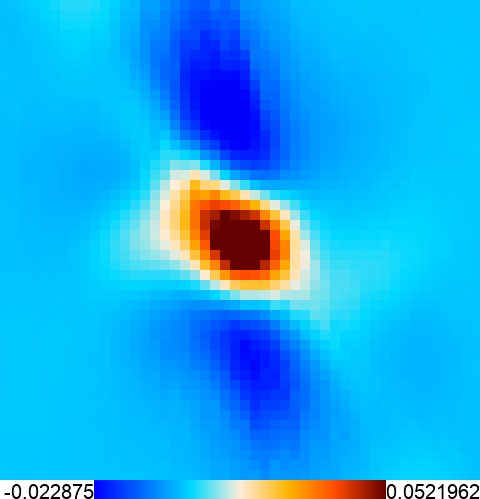

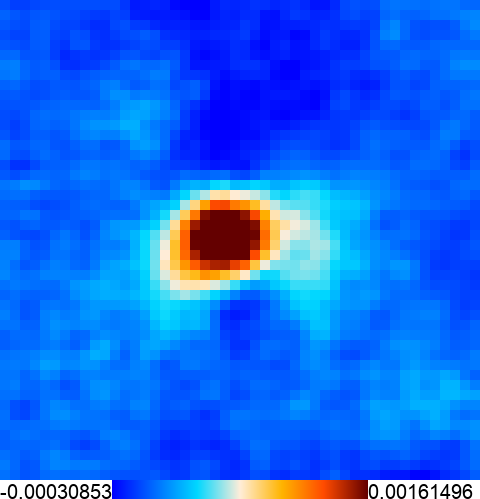

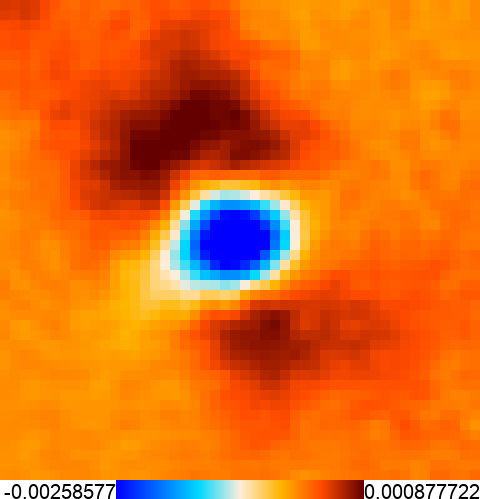

: 

In [ ]:
plotI = enplot.plot(imap_filtered_sub[0], upgrade=10, colorbar=True, grid=False)
plotQ = enplot.plot(imap_filtered_sub[1], upgrade=10, colorbar=True, grid=False)
plotU = enplot.plot(imap_filtered_sub[2], upgrade=10, colorbar=True, grid=False)
enplot.show([plotI, plotQ, plotU])
if save_plots:
    enplot.write(fname=f'figures/planck_map_{f}_filtered_ps{i_ps}_I', plot=plotI)
    enplot.write(fname=f'figures/planck_map_{f}_filtered_ps{i_ps}_Q', plot=plotQ)
    enplot.write(fname=f'figures/planck_map_{f}_filtered_ps{i_ps}_U', plot=plotU)